In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import cmocean
import matplotlib as mpl
import copy
from Paths import Figure_Save_Path, RG_PE_MLD_Path
plt.rcParams["font.family"] = "Serif"

In [2]:
Obs = xr.open_dataset(RG_PE_MLD_Path+'/pe_anomaly_grad1.nc')
Obs = Obs.rename({'mld':'MLD_1'})
Obs = xr.merge([Obs,xr.open_dataset(RG_PE_MLD_Path+'/pe_anomaly_grad10.nc').mld])
Obs = Obs.rename({'mld':'MLD_10'})
Obs = xr.merge([Obs,xr.open_dataset(RG_PE_MLD_Path+'/pe_anomaly_grad25.nc').mld])
Obs = Obs.rename({'mld':'MLD_25'})
Obs = xr.merge([Obs,xr.open_dataset(RG_PE_MLD_Path+'/pe_anomaly_grad100.nc').mld])
Obs = Obs.rename({'mld':'MLD_100'})
print(Obs)

<xarray.Dataset>
Dimensions:  (lat: 145, lon: 360, time: 202)
Coordinates:
  * time     (time) datetime64[ns] 2004-01-15T12:00:00 ... 2020-10-15
  * lat      (lat) float32 -64.5 -63.5 -62.5 -61.5 -60.5 ... 76.5 77.5 78.5 79.5
  * lon      (lon) float32 20.5 21.5 22.5 23.5 24.5 ... 376.5 377.5 378.5 379.5
Data variables:
    MLD_1    (time, lat, lon) float64 ...
    pe_anom  (time, lat, lon) float64 ...
    MLD_10   (time, lat, lon) float64 ...
    MLD_25   (time, lat, lon) float64 ...
    MLD_100  (time, lat, lon) float64 ...


/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


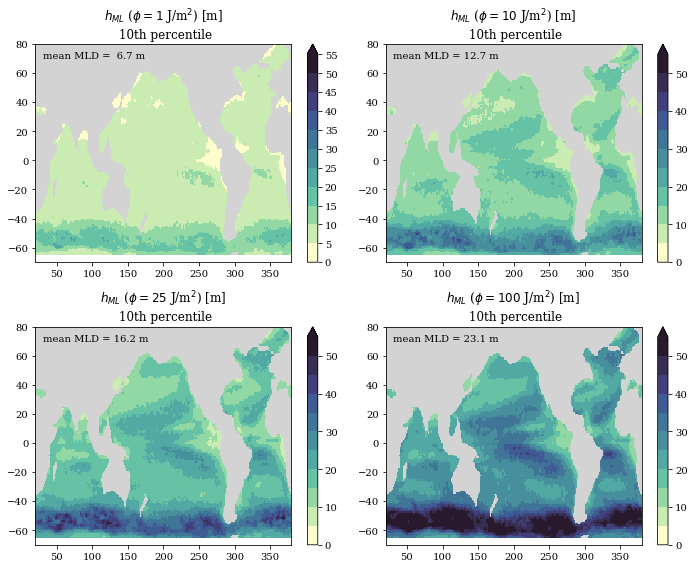

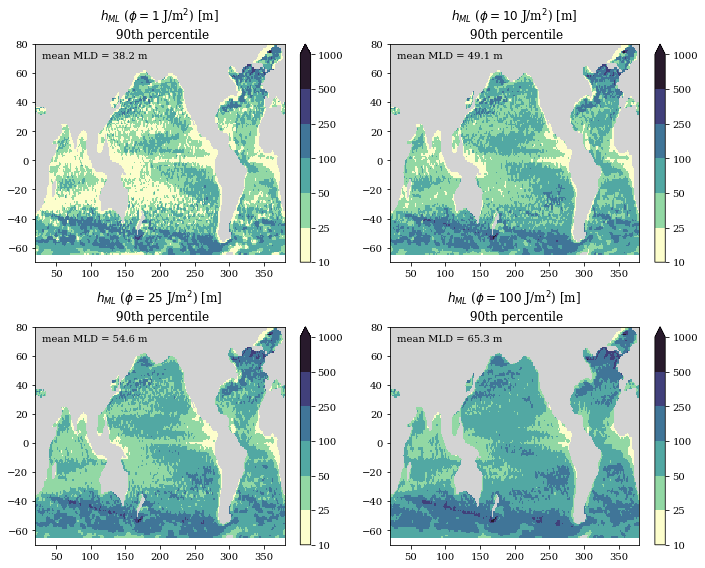

In [3]:
for PCT,PRE in[[10,'15'],[90,'16']]:
    if PCT==90:
        levels = [10,25,50,100,250,500,1000]
    elif PCT==10:
        levels = np.arange(0,60,5)

    F,A = plt.subplots(2,2,figsize=(10,8))

    cmap = copy.copy(cmocean.cm.deep)
    ax=A.ravel()[0]
    MLD = np.nanpercentile(Obs.MLD_1[:,:,:],PCT,axis=0)
    CL=ax.pcolormesh(Obs.lon,Obs.lat,MLD,
                     cmap=cmap,shading='nearest',
                     norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False))
    plt.colorbar(CL,ax=ax,extend='max',ticks=levels)
    CL.cmap.set_bad('lightgray')
    ax.set_ylim(-70,80)
    ax.set_title('$h_{ML}$ ($\phi = 1$ J/m$^2$) [m] \n '+str(PCT)+'th percentile')
    MLDmean = np.nanmean(MLD*np.broadcast_to(np.cos(Obs.lat*np.pi/180),np.shape(MLD.T)).T)
    ax.text(30,70,'mean MLD = {:4.1f} m'.format(MLDmean))

    ax=A.ravel()[1]
    MLD = np.nanpercentile(Obs.MLD_10[:,:,:],PCT,axis=0)
    CL=ax.pcolormesh(Obs.lon,Obs.lat,MLD,
                     cmap=cmap,shading='nearest',
                     norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False))
    plt.colorbar(CL,ax=ax,extend='max')
    CL.cmap.set_bad('lightgray')
    ax.set_ylim(-70,80)
    ax.set_title('$h_{ML}$ ($\phi = 10$ J/m$^2$) [m] \n '+str(PCT)+'th percentile')
    MLDmean = np.nanmean(MLD*np.broadcast_to(np.cos(Obs.lat*np.pi/180),np.shape(MLD.T)).T)
    ax.text(30,70,'mean MLD = {:4.1f} m'.format(MLDmean))

    ax=A.ravel()[2]
    MLD = np.nanpercentile(Obs.MLD_25[:,:,:],PCT,axis=0)
    CL=ax.pcolormesh(Obs.lon,Obs.lat,MLD,
                     cmap=cmap,shading='nearest',
                     norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False))
    plt.colorbar(CL,ax=ax,extend='max')
    CL.cmap.set_bad('lightgray')
    ax.set_ylim(-70,80)
    ax.set_title('$h_{ML}$ ($\phi = 25$ J/m$^2$) [m] \n '+str(PCT)+'th percentile')
    MLDmean = np.nanmean(MLD*np.broadcast_to(np.cos(Obs.lat*np.pi/180),np.shape(MLD.T)).T)
    ax.text(30,70,'mean MLD = {:4.1f} m'.format(MLDmean))

    ax=A.ravel()[3]
    MLD = np.nanpercentile(Obs.MLD_100[:,:,:],PCT,axis=0)
    CL=ax.pcolormesh(Obs.lon,Obs.lat,MLD,
                     cmap=cmap,shading='nearest',
                     norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False))
    plt.colorbar(CL,ax=ax,extend='max')
    CL.cmap.set_bad('lightgray')
    ax.set_ylim(-70,80)
    ax.set_title('$h_{ML}$ ($\phi = 100$ J/m$^2$) [m] \n '+str(PCT)+'th percentile')
    MLDmean = np.nanmean(MLD*np.broadcast_to(np.cos(Obs.lat*np.pi/180),np.shape(MLD.T)).T)
    ax.text(30,70,'mean MLD = {:4.1f} m'.format(MLDmean))

    plt.tight_layout()

    plt.savefig(Figure_Save_Path+'/Figure'+PRE+'_ArgoRG_MLD_PEAnom_'+str(PCT)+'.png')